In [1]:
import os, pandas as pd
import numpy as np
import matplotlib.pyplot as plt

MODEL = 'nli_clinical_bert'
# MODEL = 'paraphrase-distilroberta-base-v1'
# MODEL = 'paraphrase-distilroberta-base-v1'

# DATASET = 'exame_OSCE_cefaleia'
DATASET = 'exame_OSCE'

TSV_FILE = '../sentence_embedding/tsv_files/' + DATASET + '/' + MODEL
IMG_PATH = 'img/' + DATASET + '/' + MODEL + '/'

if not os.path.exists(IMG_PATH):
    os.makedirs(IMG_PATH)

df=pd.read_csv(TSV_FILE + '/word_embeddings.tsv', sep='\t',header=None)
embeddings = df.to_numpy()
X = embeddings[:, :-1]

provas = []
for i in range(len(X)):
    provas.append(i)

In [2]:
from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [3]:
from sklearn.cluster import AgglomerativeClustering

# clustering = AgglomerativeClustering(linkage='ward', n_clusters=2)
clustering = AgglomerativeClustering(linkage='ward', distance_threshold=33, n_clusters=None)

model = clustering.fit(X)



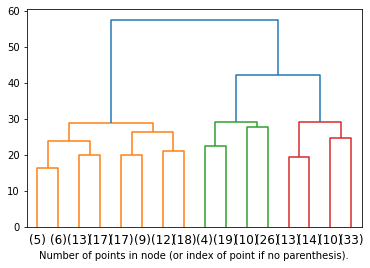

In [4]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [5]:
from matplotlib import pyplot as plt
import numpy as np

def plot_clustering(X_red, labels, title=None):
    plt.rcParams['font.sans-serif'] = ['Source Han Sans TW', 'sans-serif']
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(provas[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


2
3


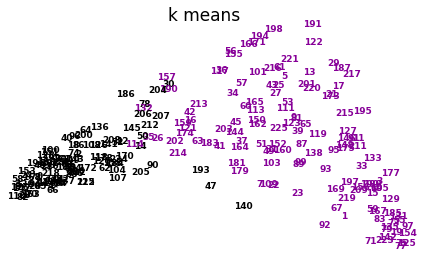

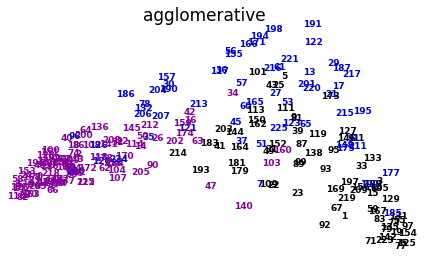

In [6]:
from sklearn import manifold

X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)

plot_clustering(X_red, kmeans.labels_, 'k means')
print(len(kmeans.cluster_centers_))
plot_clustering(X_red, clustering.labels_, 'agglomerative')
print(clustering.n_clusters_)